In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
!wget -q "https://learnopencv.com/wp-content/uploads/2024/07/mnist_0.jpg" -O "mnist_0.jpg"
!wget -q "https://learnopencv.com/wp-content/uploads/2024/07/mnist_1.jpg" -O "mnist_1.jpg"

In [8]:
import torch 
import matplotlib.pyplot as plt 
import numpy as np 
import cv2 as cv

In [9]:
print("torch version : {}".format(torch.__version__))

torch version : 2.5.1+cu121


# 1. Converting Images to Batched tensors
An image is made up of pixel arrays that represent the intensity of pixels in grayscale or the color values in RGB format. When working with deep learning models, it's often necessary to convert these images into tensors, which are the primary data structures used in PyTorch for handling and processing data.

- Tensors: In PyTorch, tensors are multi-dimensional arrays similar to NumPy arrays, but with additional capabilities for GPU acceleration and automatic differentiation. Tensors are the fundamental building blocks for representing data and parameters in neural networks.

- Batches: Batching is a technique where multiple data samples (images, in this case) are grouped together into a single tensor. This allows efficient processing of multiple samples simultaneously, to take advantage of the parallel processing capabilities of modern hardware.

In the following block, we will see an example of converting two MNIST images into a single batched tensor of shape [2,3,28,28]

In [10]:
digit_0_array_original = cv.imread("/kaggle/working/mnist_0.jpg")
digit_1_array_original = cv.imread("/kaggle/working/mnist_1.jpg")

digit_0_array_gray = cv.imread("/kaggle/working/mnist_0.jpg",cv.IMREAD_GRAYSCALE)
digit_1_array_gray = cv.imread("/kaggle/working/mnist_1.jpg",cv.IMREAD_GRAYSCALE)


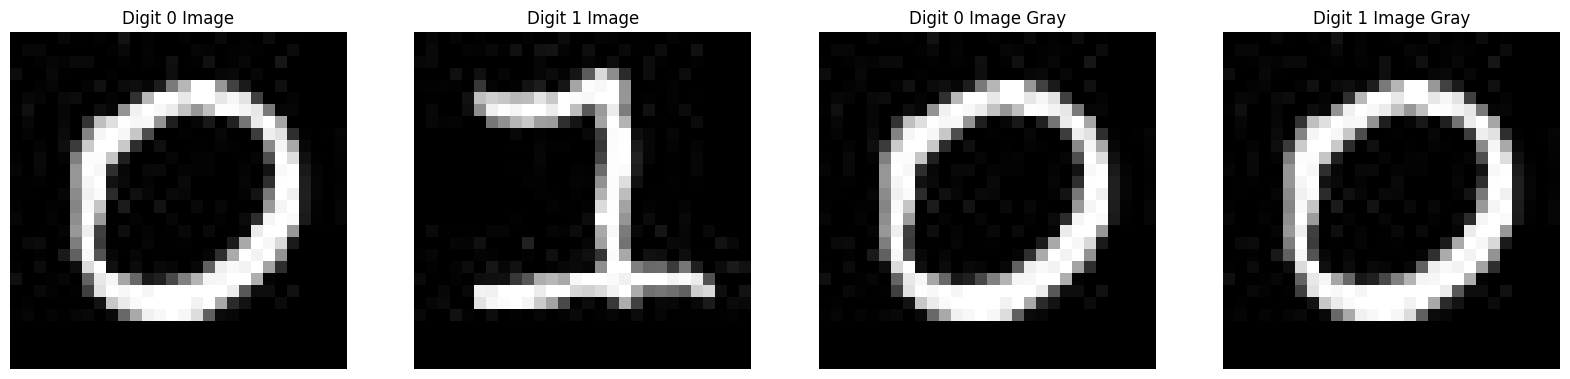

In [11]:
fig ,axs = plt.subplots(1,4 , figsize = (20,10))

axs[0].imshow(digit_0_array_original , cmap= 'gray' , interpolation = 'none' )
axs[0].set_title("Digit 0 Image")
axs[0].axis('off')

axs[1].imshow(digit_1_array_original , cmap= 'gray' , interpolation = 'none' )
axs[1].set_title("Digit 1 Image")
axs[1].axis('off')

axs[2].imshow(digit_0_array_gray , cmap= 'gray' , interpolation = 'none' )
axs[2].set_title("Digit 0 Image Gray")
axs[2].axis('off')

axs[3].imshow(digit_0_array_gray , cmap= 'gray' , interpolation = 'none' )
axs[3].set_title("Digit 1 Image Gray")
axs[3].axis('off')

plt.show()

In [12]:
digit_0_array_original.shape

(28, 28, 3)

In [13]:
print(f'min {np.min(digit_0_array_original)}')
print(f'max {np.max(digit_0_array_original)}')

min 0
max 255


In [14]:
digit_0_array_gray

array([[  0,   0,   0,   0,   7,   1,   0,   3,   0,  18,   0,   3,   0,
          0,   3,   0,   0,   9,   0,   2,   0,  11,   0,   1,   0,   0,
          0,   0],
       [  0,   7,   7,   0,   0,   0,   0,   0,   2,   8,   0,   4,   0,
          0,   0,   6,   4,   0,   2,   3,   2,   0,   0,  11,   0,   0,
          0,   0],
       [  1,   0,   2,   6,   4,   9,   9,   0,   0,   2,   0,   3,   1,
         15,   0,   2,  16,   0,   2,   7,   0,   0,  22,   0,   0,   0,
          0,   0],
       [ 12,   0,   0,   8,   1,   0,   0,   0,   2,   0,   0,   0,   0,
         14,   0,   0,   0,   7,   9,   0,   7,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   3,   5,   0,   0,   4,  16,   0,  10,  14,   6,  29,
        122, 182, 255, 255, 152,  66,  26,   0,   0,  15,   0,   0,   0,
          0,   0],
       [  0,   7,   5,   0,   9,  12,   0,   0,   4,   0,  49, 184, 255,
        255, 232, 255, 255, 231, 246, 227,  64,   0,   0,   4,   0,   0,
          0,   0],
       [  

# 1.1. Convert Numpy array to Torch tensors

* when we do any numerical calculation on images specially when we are trying to use it in a neural network we need to convert it to float32 otherwise there will be loss of precision,

In [15]:
img_tensor_0 = torch.tensor(digit_0_array_original , dtype = torch.float32)/255.0  # 1 is white 0 is black 
img_tensor_1 = torch.tensor(digit_1_array_original , dtype = torch.float32)/255.0

In [16]:
print("Shape of Normalised Digit 0 Tensor: ", img_tensor_0.shape)
print(f"Normalised Min pixel value: {torch.min(img_tensor_0)} ; Normalised Max pixel value : {torch.max(img_tensor_0)}")

Shape of Normalised Digit 0 Tensor:  torch.Size([28, 28, 3])
Normalised Min pixel value: 0.0 ; Normalised Max pixel value : 1.0


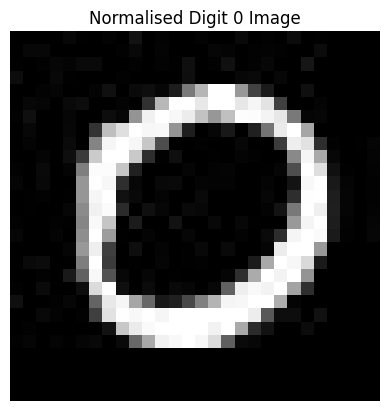

In [17]:
plt.imshow(img_tensor_0,cmap="gray")
plt.title("Normalised Digit 0 Image")
plt.axis('off')
plt.show()

In [18]:
img_tensor_0


tensor([[[0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000],
         [0.0275, 0.0275, 0.0275],
         [0.0275, 0.0275, 0.0275],
         ...,
         [0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000]],

        [[0.0039, 0.0039, 0.0039],
         [0.0000, 0.0000, 0.0000],
         [0.0078, 0.0078, 0.0078],
         ...,
         [0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000]],

        ...,

        [[0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000],
         [0.

# 1.2 Creating an input batch

In [19]:
batch_tensor = torch.stack([img_tensor_0 , img_tensor_1]) # This batch processes all together in parallel

batch_tensor.shape

# torch.Size([2, 28, 28, 3]) Number of images(samples) or shape ,height,width , number of channels 

torch.Size([2, 28, 28, 3])

Additionally in PyTorch, image tensors typically follow the shape convention [N ,C ,H ,W] unlike tensorflow which follows [N, H, W, C].

Therefore, we need to bring the color channel to the second dimension. This can be achieved using either torch.view() or torch.permute().

In [20]:
batch_input = batch_tensor.permute(0,3,1,2)
batch_input.shape

torch.Size([2, 3, 28, 28])

# 2. Introduction to Tensors and its Operations
We have seen the importance of tensors, now will understand it from ground up. Tensor is simply a fancy name given to matrices. If you are familiar with NumPy arrays, understanding and using PyTorch Tensors will be very easy. A scalar value is represented by a 0-dimensional Tensor. Similarly, a column/row matrix is represented using a 1-D Tensor and so on. Some examples of Tensors with different dimensions are shown for you to visualize and understand.

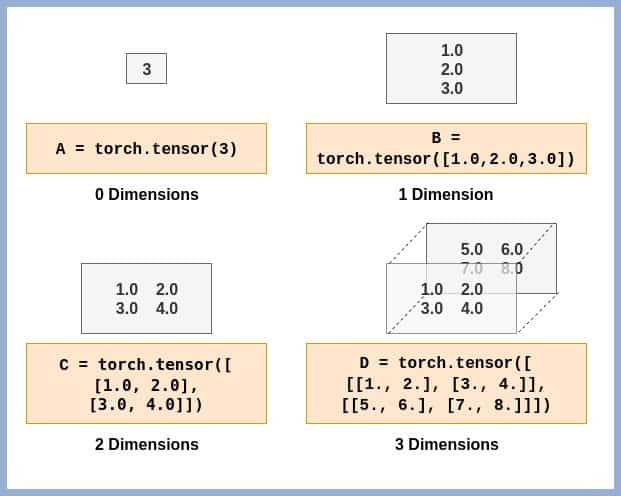

##  2.1 Construct your first tensor

In [21]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [22]:
b= torch.zeros(5)
print(b)

tensor([0., 0., 0., 0., 0.])


In [23]:
c = torch.tensor([1.0, 2.0, 3.0, 4.0, 5.0])
print(c)

tensor([1., 2., 3., 4., 5.])


In all the above cases, we have created vectors or Tensors of dimension 1. Now, let’s create some tensors of higher dimension.

In [24]:
d = torch.zeros(3,2)
print(d)

e = torch.ones(3,2)
print(e)

f = torch.tensor([[1.0, 2.0],[3.0, 4.0]])
print(f)

# 3D Tensor
g = torch.tensor([[[1., 2.], [3., 4.]], [[5., 6.], [7., 8.]]])
print(g)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])


In [25]:
print(f.shape)

print(e.shape)

print(g.shape)

torch.Size([2, 2])
torch.Size([3, 2])
torch.Size([2, 2, 2])


## 2.2. Access an element in Tensor

In [26]:
print(c[2])

tensor(3.)


In [27]:
print(f[1,0])

tensor(3.)


In [28]:
print(g[1,0,0])
print(g[1][0][0])

tensor(5.)
tensor(5.)


In [29]:
print(f[:])

tensor([[1., 2.],
        [3., 4.]])


In [30]:
print(c[1:3])

tensor([2., 3.])


In [31]:
print(c[:4])

tensor([1., 2., 3., 4.])


In [32]:
print(f[0,:])

tensor([1., 2.])


In [33]:
print(f[:,1])

tensor([2., 4.])


## 2.3. Specify data type of elements
Whenever we create a tensor, PyTorch decides the data type of the elements of the tensor such that the data type can cover all the elements of the tensor. We can override this by specifying the data type while creating the tensor.

In [34]:
int_tensor = torch.tensor([[1,2,3],[4,5,6]])
print(int_tensor.dtype)

# What if we changed any one element to floating point number?
int_tensor = torch.tensor([[1,2,3],[4.,5,6]])
print(int_tensor.dtype)
print(int_tensor)

# This can be overridden as follows
float_tensor = torch.tensor([[1, 2, 3],[4., 5, 6]])
int_tensor = float_tensor.type(torch.int64)
print(int_tensor.dtype)
print(int_tensor)

torch.int64
torch.float32
tensor([[1., 2., 3.],
        [4., 5., 6.]])
torch.int64
tensor([[1, 2, 3],
        [4, 5, 6]])


## 2.4. Tensor to/from NumPy Array
We have mentioned several times that PyTorch Tensors and NumPy arrays are pretty similar. This of course demands the question if it’s possible to convert one data structure into another. Let’s see how we can do this.

In [35]:
# Tensor to Array
f_numpy = f.numpy()
print(f_numpy)

# Array to Tensor
h = np.array([[8,7,6,5],[4,3,2,1]])
h_tensor = torch.from_numpy(h)
print(h_tensor)

[[1. 2.]
 [3. 4.]]
tensor([[8, 7, 6, 5],
        [4, 3, 2, 1]])


In [36]:
# Create tensor
tensor1 = torch.tensor([[1,2,3],[4,5,6]])
tensor2 = torch.tensor([[-1,2,-3],[4,-5,6]])

# Addition
print(tensor1+tensor2)
# We can also use
print(torch.add(tensor1,tensor2))

# Subtraction
print(tensor1-tensor2)
# We can also use
print(torch.sub(tensor1,tensor2))

# Multiplication
# Tensor with Scalar
print(tensor1 * 2)

# Tensor with another tensor
# Elementwise Multiplication
print(tensor1 * tensor2)

# Matrix multiplication
tensor3 = torch.tensor([[1,2],[3,4],[5,6]])
print(torch.mm(tensor1,tensor3))

# Division
# Tensor with scalar
print(tensor1/2)

# Tensor with another tensor
# Elementwise division
print(tensor1/tensor2)

tensor([[ 0,  4,  0],
        [ 8,  0, 12]])
tensor([[ 0,  4,  0],
        [ 8,  0, 12]])
tensor([[ 2,  0,  6],
        [ 0, 10,  0]])
tensor([[ 2,  0,  6],
        [ 0, 10,  0]])
tensor([[ 2,  4,  6],
        [ 8, 10, 12]])
tensor([[ -1,   4,  -9],
        [ 16, -25,  36]])
tensor([[22, 28],
        [49, 64]])
tensor([[0.5000, 1.0000, 1.5000],
        [2.0000, 2.5000, 3.0000]])
tensor([[-1.,  1., -1.],
        [ 1., -1.,  1.]])


## 2.6. Broadcasting
* a is a 1-dimensional tensor with shape ([ 3 ]).
* b is a scalar tensor with shape ([ 1 ]).
When adding a and b, PyTorch broadcasts b to match the shape of a, resulting in ([ 1 + 4, 2 + 4, 3 + 4 ]).

In [37]:
# Create two 1-dimensional tensors
a = torch.tensor([1, 2, 3])
b = torch.tensor([4])

# adding a scalar to a vector
result = a + b

print("Result of Broadcasting:\n",result)

Result of Broadcasting:
 tensor([5, 6, 7])


In [38]:
# Create two tensors with shapes (1, 3) and (3, 1)
a = torch.tensor([[1, 2, 3]])
b = torch.tensor([[4], [5], [6]])

# adding tensors of different shapes
result = a + b
print("Shape: ", result.shape)
print("\n")
print("Result of Broadcasting:\n", result)

Shape:  torch.Size([3, 3])


Result of Broadcasting:
 tensor([[5, 6, 7],
        [6, 7, 8],
        [7, 8, 9]])


## 2.7. CPU v/s GPU Tensor
Let’s first see how to create a tensor for GPU.

In [39]:
# Create a tensor for CPU
# This will occupy CPU RAM
tensor_cpu = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]], device='cpu')

# Create a tensor for GPU
# This will occupy GPU RAM
tensor_gpu = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]], device='cuda')

In [40]:
# This uses CPU RAM
tensor_cpu = tensor_cpu * 5

# This uses GPU RAM
# Focus on GPU RAM Consumption
tensor_gpu = tensor_gpu * 5

In [41]:
# Move GPU tensor to CPU
tensor_gpu_cpu = tensor_gpu.to(device='cpu')

# Move CPU tensor to GPU
tensor_cpu_gpu = tensor_cpu.to(device='cuda')

In [50]:
 a = torch.tensor([[1, 2], [3, 4]])
 b = torch.tensor([[5, 6], [7, 8]])
 c = torch.tensor([[2, 2], [2, 2]])
 d = a + b
 e = d * c

In [51]:
print(d)
print(e)

tensor([[ 6,  8],
        [10, 12]])
tensor([[12, 16],
        [20, 24]])


In [54]:
a = torch.tensor([[1, 2], [3, 4]])
b = torch.tensor([[5, 6], [7, 8]])
c = torch.tensor([[2], [2]])
d = a + b
e = d * c

In [55]:
print(d)
print(e)

tensor([[ 6,  8],
        [10, 12]])
tensor([[12, 16],
        [20, 24]])
